In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import datasets,layers,models
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D,MaxPooling2D, Dropout, BatchNormalization

%matplotlib inline

In [48]:
cifar10 = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [49]:
#checking the shape
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [50]:
#converting values to float and normalizing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train=X_train/255
X_test=X_test/255

In [51]:
#encoding
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [52]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [53]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

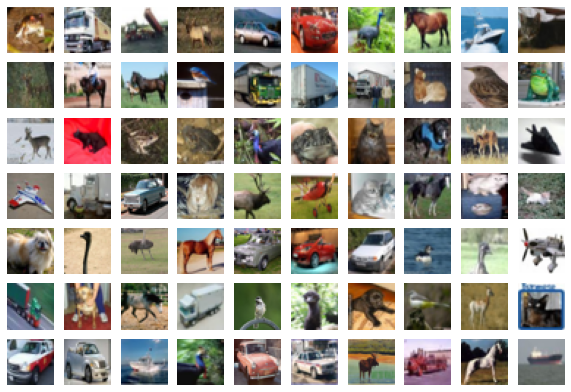

In [54]:
#visualising samples
plt.figure(figsize = (10,10))
for i in range(70):
  plt.subplot(10,10,1+i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap = 'gray')

In [55]:
cnn_model = models.Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(AveragePooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [56]:
opt = optimizers.Adam(learning_rate = 0.001)
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [57]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 128)        

In [58]:
# fitting the train data into the model
history = cnn_model.fit(X_train, Y_train, batch_size = 32, epochs = 10, shuffle = True,validation_data=(X_test,Y_test))

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5577 - accuracy: 0.4259 - val_loss: 1.2338 - val_accuracy: 0.5619
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1702 - accuracy: 0.5805 - val_loss: 1.0794 - val_accuracy: 0.6005
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9999 - accuracy: 0.6457 - val_loss: 0.8761 - val_accuracy: 0.6952
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8796 - accuracy: 0.6900 - val_loss: 0.8025 - val_accuracy: 0.7223
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8078 - accuracy: 0.7146 - val_loss: 0.7952 - val_accuracy: 0.7207
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7434 - accuracy: 0.7376 - val_loss: 0.7669 - val_accuracy: 0.7321
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6909 - accuracy: 0.7574 - val_loss: 0.7924 - val_ac

In [59]:
# Evaluating the model performance
evaluation = cnn_model.evaluate(X_test, Y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.7580 - accuracy: 0.7535
Test Accuracy: 0.7534999847412109


In [60]:
predicted_classes = cnn_model.predict_classes(X_test) 
predicted_classes

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 8, 1, ..., 5, 1, 7])

In [61]:
Y_test = Y_test.argmax(1)
Y_test

array([3, 8, 8, ..., 5, 1, 7])

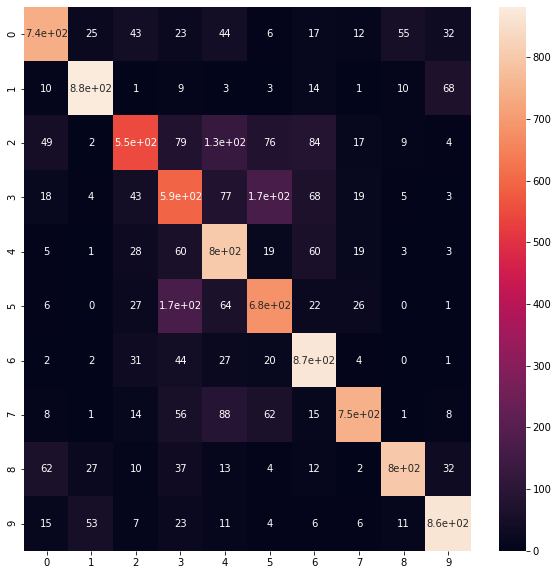

In [62]:
# plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [63]:
# generating more data using the existing data
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            #width_shift_range = 0.1,
                            horizontal_flip = True,
                             )
datagen.fit(X_train)

In [64]:
# retraining the model
cnn_model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 32), epochs = 5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6694 - accuracy: 0.7687
Epoch 2/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6445 - accuracy: 0.7745
Epoch 3/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6212 - accuracy: 0.7829
Epoch 4/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6003 - accuracy: 0.7909
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5738 - accuracy: 0.7977


In [65]:
# encoding the Predictor variable
Y_test = to_categorical(Y_test, 10)

In [66]:
# printing the accuracy
score = cnn_model.evaluate(X_test, Y_test)
print('Test accuracy', score[0])

313/313 [==============================] - 1s 4ms/step - loss: 0.6782 - accuracy: 0.7741
Test accuracy 0.6781907081604004
